# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [125]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
dt = pd.read_csv('/Users/veronikaplonsak/scaling_to_production/05_src/data/forest+fires/forestfires.csv', header = 0, names = columns)
print(dt)

     coord_x  coord_y month  day  ffmc    dmc     dc   isi  temp  rh  wind  \
0          7        5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   
1          7        4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   
2          7        4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   
3          8        6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   
4          8        6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   
..       ...      ...   ...  ...   ...    ...    ...   ...   ...  ..   ...   
512        4        3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   
513        2        4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   
514        7        4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   
515        1        4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   
516        6        3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   

     rain   area  
0     0.0   0.00  
1     0.0   0.00  
2     

In [126]:
dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Get X and Y

Create the features data frame and target data.

In [127]:
from sklearn.model_selection import train_test_split, cross_validate

X = dt.drop(columns = 'area')
Y = dt['area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

num_cols = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day']

In [129]:
X.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [130]:
X.dtypes

coord_x      int64
coord_y      int64
month       object
day         object
ffmc       float64
dmc        float64
dc         float64
isi        float64
temp       float64
rh           int64
wind       float64
rain       float64
dtype: object

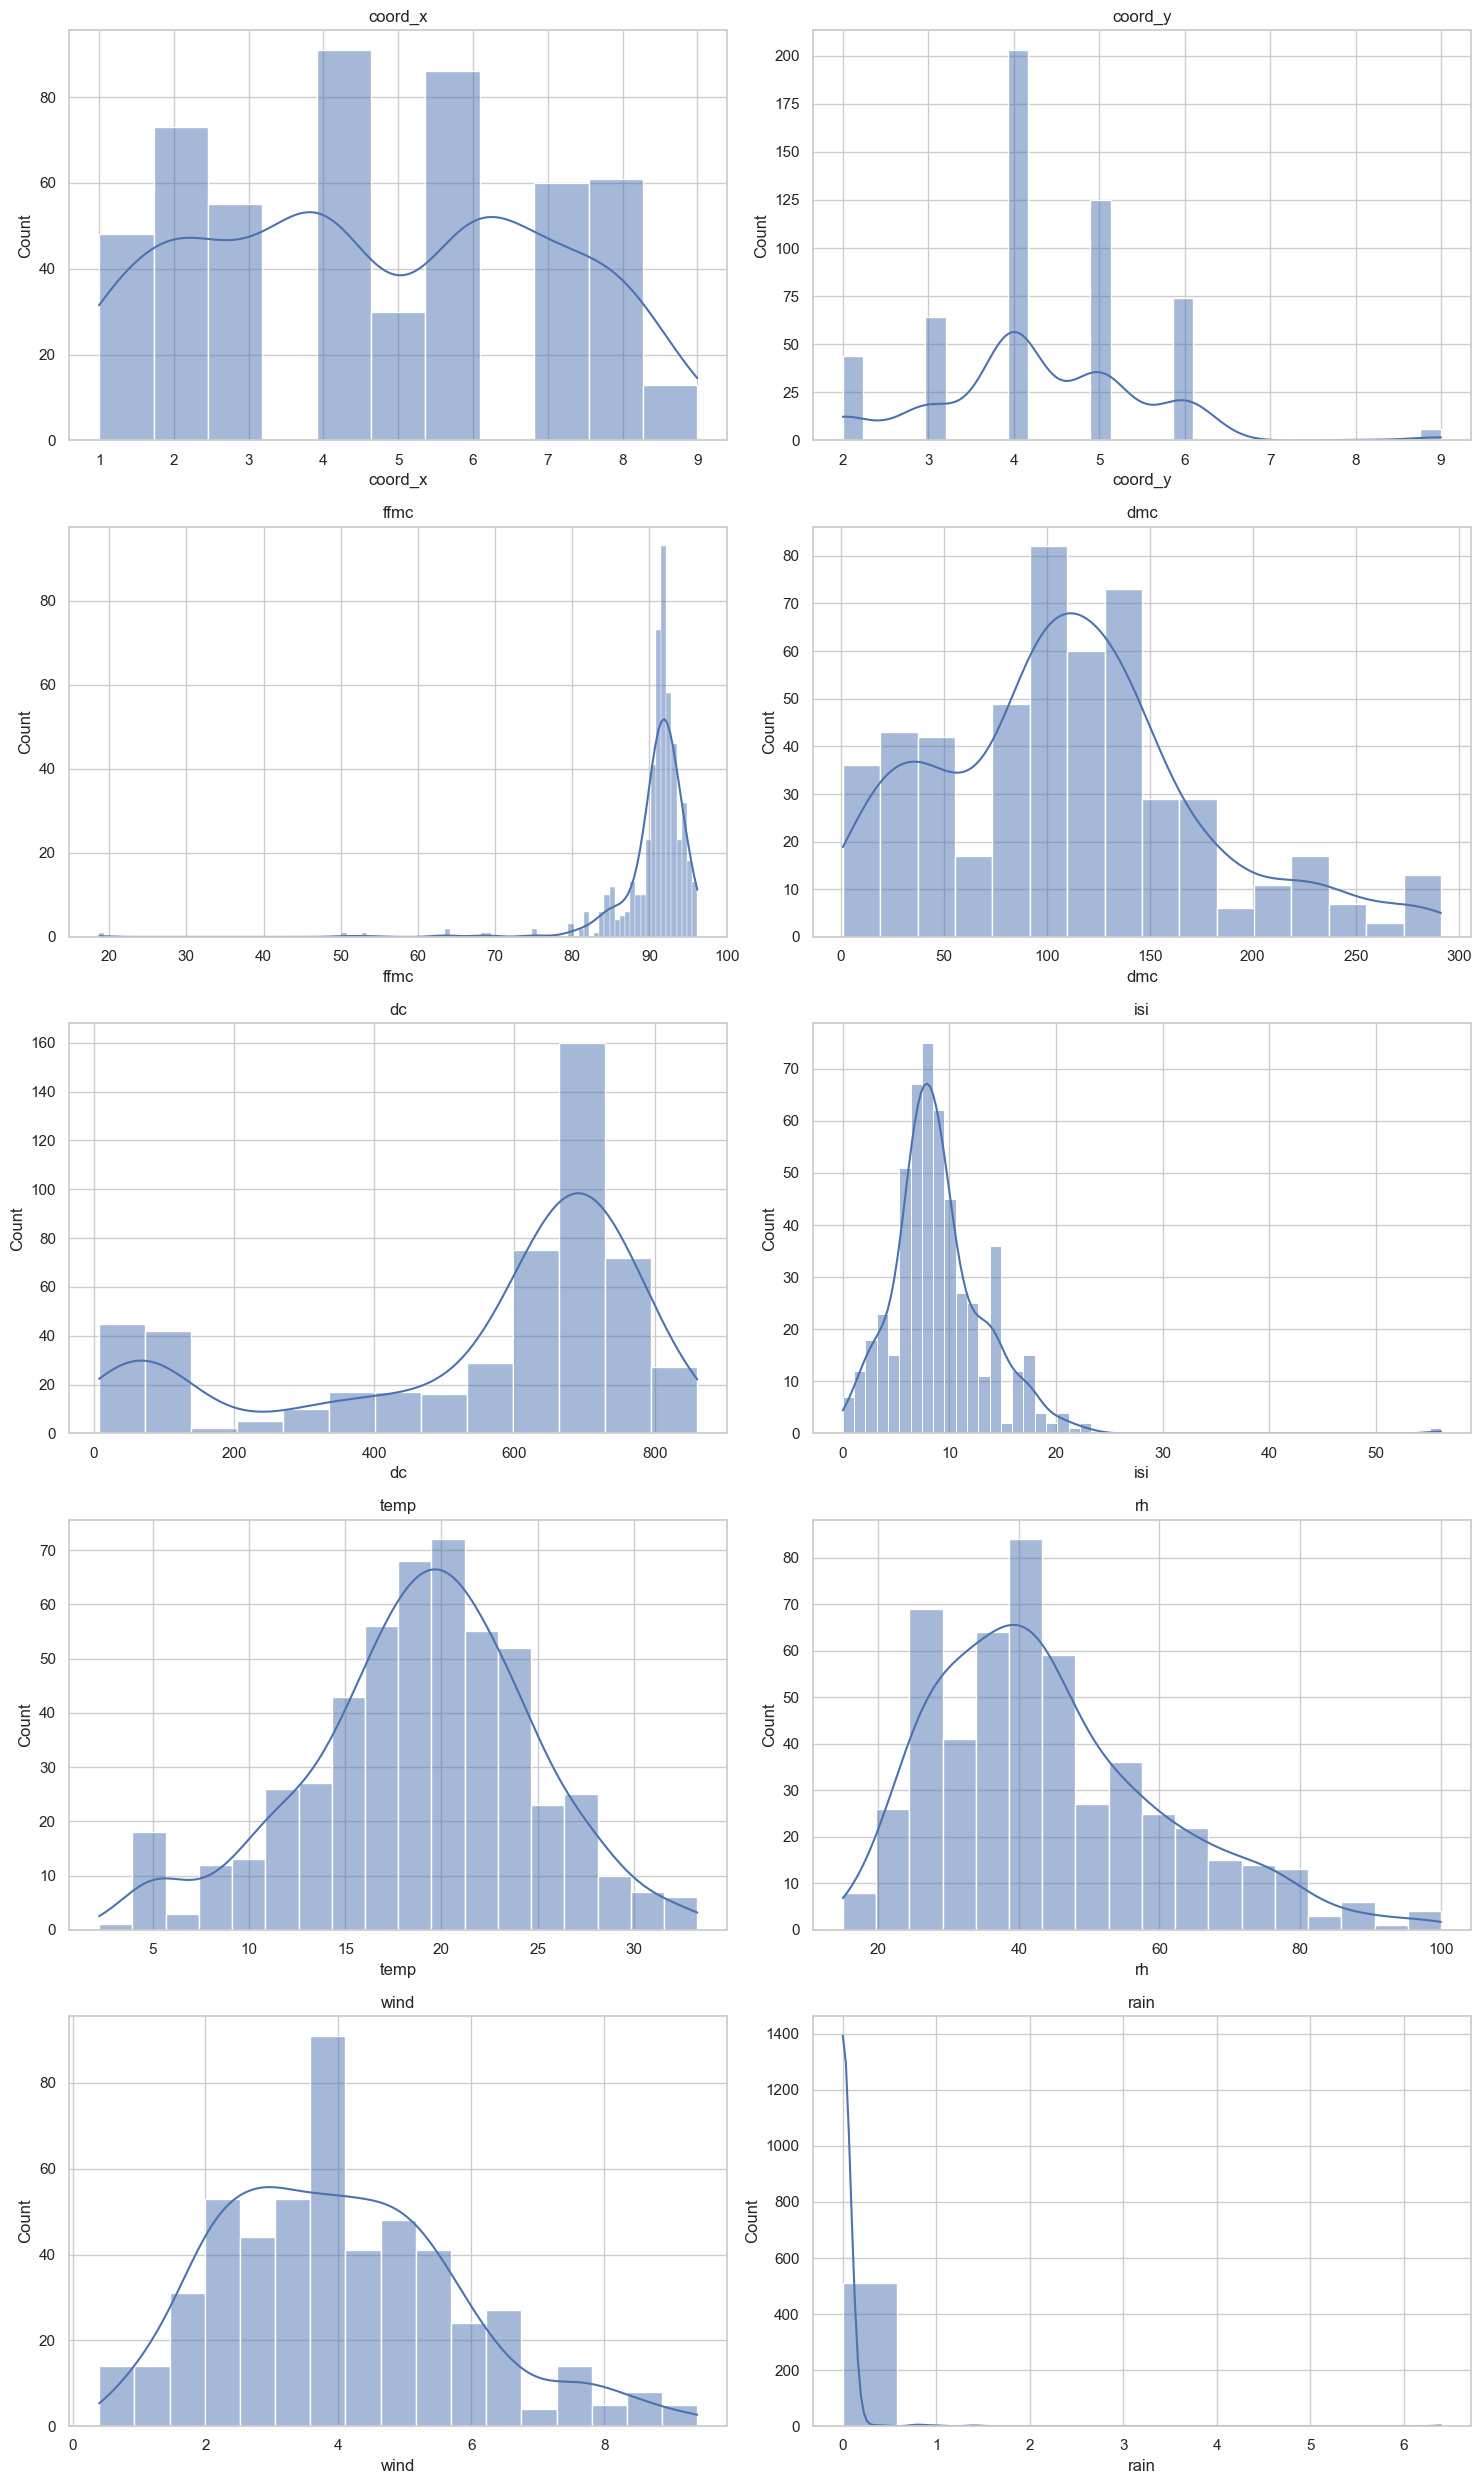

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
count = 0
for col in num_cols:
    sns.histplot(X[col], kde=True, ax=axes[count//2, count%2])
    axes[count//2, count%2].set_title(col)
    count=count+1

plt.tight_layout()
plt.show()

In [132]:
num_cols_transform =  [ 'ffmc', 'isi','rh']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [133]:
preproc1 = ColumnTransformer(
    [('standardizer', StandardScaler(),num_cols),
      ('OHE', OneHotEncoder(handle_unknown = 'infrequent_if_exist'),cat_cols)])
preproc1

ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [134]:
# preproc 2
preproc2 = ColumnTransformer(
    [('standardizer', StandardScaler(),num_cols),
     ('transform', PowerTransformer(method='yeo-johnson'),num_cols_transform),
     ('OHE', OneHotEncoder(handle_unknown = 'infrequent_if_exist'),cat_cols)])
preproc2


ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('transform', PowerTransformer(),
                                 ['ffmc', 'isi', 'rh']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [135]:
pipeline_A = Pipeline([
    ('preprocess', preproc1),
    ('regressor', KNeighborsRegressor())
])
print(pipeline_A.get_params())

{'memory': None, 'steps': [('preprocess', ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])), ('regressor', KNeighborsRegressor())], 'verbose': False, 'preprocess': ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])]), 'regressor': KNeighborsRegressor(), 'preprocess__n_jobs': None, 'preprocess__remainder': 'dr

In [136]:
pipeline_B = Pipeline([
    ('preprocess', preproc2),
    ('regressor', KNeighborsRegressor())
])

In [137]:
pipeline_C = Pipeline([
    ('preprocess', preproc1),
    ('random_forest', RandomForestRegressor())
])
print(pipeline_C.get_params())

{'memory': None, 'steps': [('preprocess', ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])])), ('random_forest', RandomForestRegressor())], 'verbose': False, 'preprocess': ColumnTransformer(transformers=[('standardizer', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['month', 'day'])]), 'random_forest': RandomForestRegressor(), 'preprocess__n_jobs': None, 'preprocess__rem

In [138]:
pipeline_D = Pipeline([
    ('preprocess', preproc2),
    ('random_forest', RandomForestRegressor())
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [139]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [140]:
param_grid_A = [{'regressor__n_neighbors': [10,15,20,30], 'regressor__weights': ['uniform','distance'],'regressor__p':[1,2]}]

grid_cv_A = GridSearchCV(
    estimator= pipeline_A, 
    param_grid=param_grid_A, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_A.fit(X_train, Y_train)

res_A = grid_cv_A.cv_results_
res_A = pd.DataFrame(res_A)
print(grid_cv_A.best_score_)
print(grid_cv_A.best_params_)
print(grid_cv_A.best_estimator_)

-41.0408569278201
{'regressor__n_neighbors': 30, 'regressor__p': 2, 'regressor__weights': 'uniform'}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=30))])


In [141]:
param_grid_B = [{'regressor__n_neighbors': [10,15,20,30], 'regressor__weights': ['uniform','distance'],'regressor__p':[1,2]}]

grid_cv_B = GridSearchCV(
    estimator= pipeline_B, 
    param_grid=param_grid_B, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)
grid_cv_B.fit(X_train, Y_train)

res_B = grid_cv_B.cv_results_
res_B = pd.DataFrame(res_B)
print(grid_cv_B.best_score_)
print(grid_cv_B.best_params_)
print(grid_cv_B.best_estimator_)

-41.36900223734132
{'regressor__n_neighbors': 30, 'regressor__p': 2, 'regressor__weights': 'uniform'}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('transform',
                                                  PowerTransformer(),
                                                  ['ffmc', 'isi', 'rh']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor(n_neighbo

In [142]:
param_grid_C = [{'random_forest__min_samples_leaf': [1, 2, 5],
                 'random_forest__min_samples_split': [2, 3, 4],
                 'random_forest__max_depth': [5, 7, 10],
                 'random_forest__n_estimators': [50, 100, 200]}]

grid_cv_C = GridSearchCV(
    estimator= pipeline_C, 
    param_grid=param_grid_C, 
    scoring = 'neg_root_mean_squared_error', 
    cv = 5)

grid_cv_C.fit(X_train, Y_train)

res_C = grid_cv_C.cv_results_
res_C = pd.DataFrame(res_C)
print(grid_cv_C.best_score_)
print(grid_cv_C.best_params_)
print(grid_cv_C.best_estimator_)


-43.35722494543959
{'random_forest__max_depth': 7, 'random_forest__min_samples_leaf': 5, 'random_forest__min_samples_split': 4, 'random_forest__n_estimators': 100}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=7, min_samples_leaf=5,
                                       min_samples_split=4))])


In [143]:
param_grid_D = {
    'random_forest__min_samples_leaf': [1, 2, 5],
    'random_forest__min_samples_split': [2, 3, 4],
    'random_forest__max_depth': [5, 7, 10],
    'random_forest__n_estimators': [50, 100, 200]
}

# Set up GridSearchCV for pipeline D
grid_cv_D = GridSearchCV(
    estimator=pipeline_D, 
    param_grid=param_grid_D, 
    scoring='neg_root_mean_squared_error', 
    cv=5
)

# Fit GridSearchCV
grid_cv_D.fit(X_train, Y_train)

# Retrieve results
res_D = grid_cv_D.cv_results_
res_D = pd.DataFrame(res_D)
print(grid_cv_D.best_score_)
print(grid_cv_D.best_params_)
print(grid_cv_D.best_estimator_)

-42.83367575274508
{'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 5, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 50}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardizer',
                                                  StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('transform',
                                                  PowerTransformer(),
                                                  ['ffmc', 'isi', 'rh']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['month', 'day'])]))

# Evaluate

+ Which model has the best performance?

In [144]:
import numpy as np
def RMSE (a,b):
    
    return np.sqrt(np.mean(np.square((a - b))))

In [145]:
best_A = grid_cv_A.best_estimator_
best_A.fit(X_train,Y_train)
rmse_A = RMSE(Y_test.to_numpy(), best_A.predict(X_test))
print(rmse_A)

89.43824739200062


In [146]:
best_B = grid_cv_B.best_estimator_
best_B.fit(X_train,Y_train)
rmse_B = RMSE(Y_test.to_numpy(), best_B.predict(X_test))
print(rmse_B)

89.35141043181841


In [147]:
best_C = grid_cv_C.best_estimator_
best_C.fit(X_train,Y_train)
rmse_C = RMSE(Y_test.to_numpy(), best_C.predict(X_test))
print(rmse_C)

88.63151781156478


In [148]:
best_D = grid_cv_D.best_estimator_
best_D.fit(X_train,Y_train)
rmse_D = RMSE(Y_test.to_numpy(), best_D.predict(X_test))
print(rmse_D)

89.6339389201196


In [149]:
RMSE(Y_test.to_numpy(),np.zeros(len(Y_test)))


90.45502403801542

# Export

+ Save the best performing model to a pickle file.

In [150]:
import pickle

pickle.dump(best_C, open("best_model.pkl", "wb"))

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

*(Answer here.)*

# TEST SET - individual observation

In [151]:
import shap
data_transform = best_C.named_steps['preprocess'].transform(X_test)

explainer = shap.TreeExplainer(
    best_C.named_steps['random_forest'], 
    data_transform,
    feature_names = best_C.named_steps['preprocess'].get_feature_names_out())

shap_values = explainer(data_transform,check_additivity= False)

best_C.named_steps['preprocess'].get_feature_names_out()


array(['standardizer__coord_x', 'standardizer__coord_y',
       'standardizer__ffmc', 'standardizer__dmc', 'standardizer__dc',
       'standardizer__isi', 'standardizer__temp', 'standardizer__rh',
       'standardizer__wind', 'standardizer__rain', 'OHE__month_apr',
       'OHE__month_aug', 'OHE__month_dec', 'OHE__month_feb',
       'OHE__month_jan', 'OHE__month_jul', 'OHE__month_jun',
       'OHE__month_mar', 'OHE__month_may', 'OHE__month_nov',
       'OHE__month_oct', 'OHE__month_sep', 'OHE__day_fri', 'OHE__day_mon',
       'OHE__day_sat', 'OHE__day_sun', 'OHE__day_thu', 'OHE__day_tue',
       'OHE__day_wed'], dtype=object)

In [152]:
shap_values[1].values

array([ 1.05541641e+00, -9.48009818e-01, -1.01714485e+00,  9.45603552e-01,
       -1.43966014e+00, -6.11336618e-01, -2.58609498e+00, -8.64895653e-02,
        7.49879494e-02,  0.00000000e+00,  0.00000000e+00, -8.48167986e-02,
       -1.01976149e-03, -6.80293537e-03,  0.00000000e+00, -6.13054250e-01,
        0.00000000e+00, -8.02464477e-03,  0.00000000e+00,  0.00000000e+00,
       -4.53333341e-05, -7.59245843e-01, -6.61133782e-02, -1.69145826e-01,
       -1.22072308e+00, -1.00681531e-01, -2.02380465e-02,  7.05113728e-01,
       -1.37443993e-02])

In [153]:
lst = []
for i in range(len(shap_values[1])):
    lst.append([best_C.named_steps['preprocess'].get_feature_names_out()[i],shap_values[1].values[i]])
lst = sorted(lst,key=lambda x: np.abs(x[1]),reverse = True)  

for i in range(len(lst)):
    print(lst[i])

['standardizer__temp', -2.5860949835859355]
['standardizer__dc', -1.4396601432646277]
['OHE__day_sat', -1.2207230837459428]
['standardizer__coord_x', 1.0554164051778208]
['standardizer__ffmc', -1.017144846029405]
['standardizer__coord_y', -0.9480098177737091]
['standardizer__dmc', 0.9456035517601413]
['OHE__month_sep', -0.7592458428780082]
['OHE__day_tue', 0.7051137277265661]
['OHE__month_jul', -0.6130542498687283]
['standardizer__isi', -0.6113366179389413]
['OHE__day_mon', -0.16914582645171322]
['OHE__day_sun', -0.10068153110798449]
['standardizer__rh', -0.08648956528457347]
['OHE__month_aug', -0.0848167985570035]
['standardizer__wind', 0.07498794940765947]
['OHE__day_fri', -0.06611337822047063]
['OHE__day_thu', -0.020238046487793326]
['OHE__day_wed', -0.013744399268180132]
['OHE__month_mar', -0.008024644772522151]
['OHE__month_feb', -0.0068029353674501185]
['OHE__month_dec', -0.0010197614878416062]
['OHE__month_oct', -4.533333412837237e-05]
['standardizer__rain', 0.0]
['OHE__month_ap

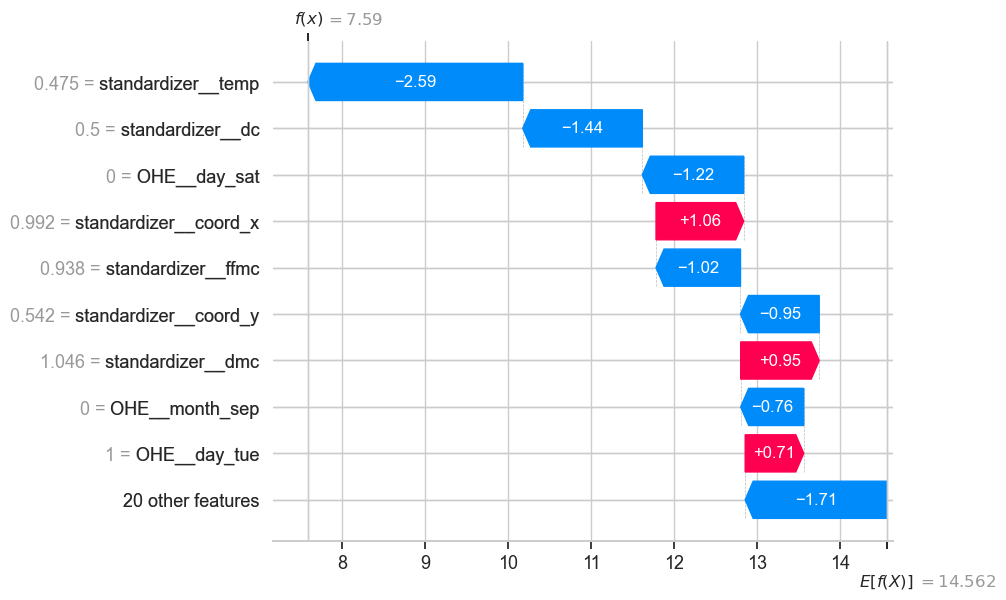

In [154]:
shap.plots.waterfall(shap_values[1])


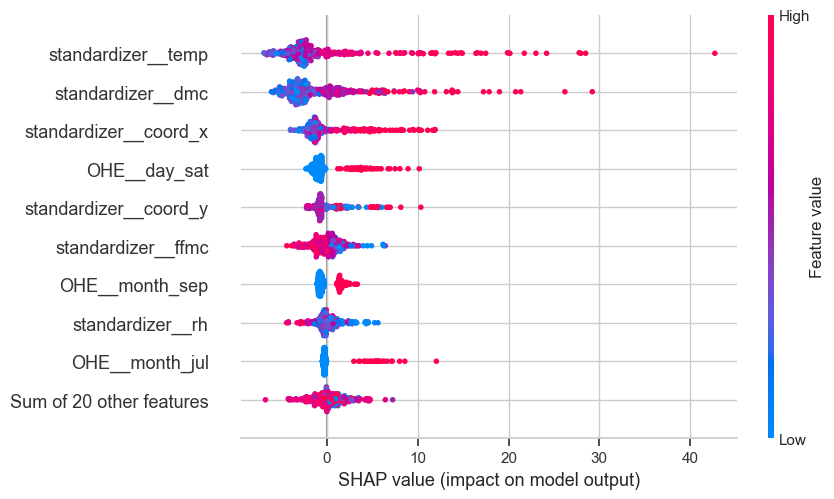

In [155]:
# TRAINNING SET 

data_transform = best_C.named_steps['preprocess'].transform(X_train)

explainer = shap.TreeExplainer(
    best_C.named_steps['random_forest'], 
    data_transform,
    feature_names = best_C.named_steps['preprocess'].get_feature_names_out())

shap_values = explainer(data_transform,check_additivity= False)

shap.plots.beeswarm(shap_values)


In [156]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

shap_importance


,col_name,feature_importance_vals
6,standardizer__temp,4.183603
3,standardizer__dmc,3.637878
0,standardizer__coord_x,2.232194
24,OHE__day_sat,1.498937
1,standardizer__coord_y,1.267997
2,standardizer__ffmc,1.126681
21,OHE__month_sep,1.026488
7,standardizer__rh,0.893915
15,OHE__month_jul,0.664840
4,standardizer__dc,0.602847


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.